<a href="https://colab.research.google.com/github/mangeshtate/Python-Collab-Notebook/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1. Load the dataset
data = pd.read_csv("ecosystem_data.csv")

# Preview first rows
print("Dataset preview:")
print(data.head())

# 2. Separate features (X) and target (y)
# ⚠️ Replace 'TargetColumn' with the actual name of the column you want to predict
X = data.drop("ecosystem_health", axis=1)
y = data["ecosystem_health"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Make predictions
y_pred = nb_model.predict(X_test)

# 6. Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Dataset preview:
   water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0      37.454012         112.092246            0.729998         63.814457   
1      95.071431          99.873629            0.184512         45.929245   
2      73.199394          52.846174            0.346640         96.449852   
3      59.865848         182.180001            0.663281         21.897845   
4      15.601864         142.987248            0.482089         58.785642   

    soil_ph ecosystem_health  
0  5.144016         degraded  
1  4.021498         degraded  
2  4.194976         degraded  
3  4.493691         degraded  
4  4.620093         degraded  

Confusion Matrix:
[[ 140   81    1]
 [   0 1757    0]
 [  15    0    6]]

Classification Report:
              precision    recall  f1-score   support

     at risk       0.90      0.63      0.74       222
    degraded       0.96      1.00      0.98      1757
     healthy       0.86      0.29      0.43        21

    accuracy      

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("ecosystem_data.csv")

# Example: check frequency of values in target column
print(data["ecosystem_health"].value_counts())

ecosystem_health
degraded    8761
at risk     1120
healthy      119
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("ecosystem_data.csv")

# Check class distribution first
print("Class distribution:")
print(data["ecosystem_health"].value_counts())

# Encode target labels
label_encoder = LabelEncoder()
data["ecosystem_health_encoded"] = label_encoder.fit_transform(data["ecosystem_health"])

# Show mapping
print("\nLabel Mapping:")
for cls, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{cls} → {code}")

# Preview dataset
print("\nDataset with encoded target:")
print(data[["ecosystem_health", "ecosystem_health_encoded"]].head())


Class distribution:
ecosystem_health
degraded    8761
at risk     1120
healthy      119
Name: count, dtype: int64

Label Mapping:
at risk → 0
degraded → 1
healthy → 2

Dataset with encoded target:
  ecosystem_health  ecosystem_health_encoded
0         degraded                         1
1         degraded                         1
2         degraded                         1
3         degraded                         1
4         degraded                         1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("ecosystem_data.csv")

# Encode target labels
label_encoder = LabelEncoder()
data["ecosystem_health_encoded"] = label_encoder.fit_transform(data["ecosystem_health"])

# Count class distribution
class_counts = data["ecosystem_health_encoded"].value_counts()
print("Class distribution:\n", class_counts)

# Identify majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

print(f"\nMajority Class: {majority_class} ({class_counts.max()} samples)")
print(f"Minority Class: {minority_class} ({class_counts.min()} samples)")

# Create separate DataFrames
majority_df = data[data["ecosystem_health_encoded"] == majority_class]
minority_df = data[data["ecosystem_health_encoded"] == minority_class]

print("\nMajority Class DataFrame shape:", majority_df.shape)
print("Minority Class DataFrame shape:", minority_df.shape)

# (Optional) Preview
print("\nMajority Class Sample:")
print(majority_df.head())

print("\nMinority Class Sample:")
print(minority_df.head())


Class distribution:
 ecosystem_health_encoded
1    8761
0    1120
2     119
Name: count, dtype: int64

Majority Class: 1 (8761 samples)
Minority Class: 2 (119 samples)

Majority Class DataFrame shape: (8761, 7)
Minority Class DataFrame shape: (119, 7)

Majority Class Sample:
   water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0      37.454012         112.092246            0.729998         63.814457   
1      95.071431          99.873629            0.184512         45.929245   
2      73.199394          52.846174            0.346640         96.449852   
3      59.865848         182.180001            0.663281         21.897845   
4      15.601864         142.987248            0.482089         58.785642   

    soil_ph ecosystem_health  ecosystem_health_encoded  
0  5.144016         degraded                         1  
1  4.021498         degraded                         1  
2  4.194976         degraded                         1  
3  4.493691         degraded     

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import pandas as pd

le = LabelEncoder()
data['ecosystem_health_encoded'] = le.fit_transform(data['ecosystem_health'])
df_degraded = data[data['ecosystem_health_encoded'] == 1] # Based on previous output, 'degraded' is encoded as 1
df_at_risk = data[data['ecosystem_health_encoded'] == 0] # Based on previous output, 'at risk' is encoded as 0
df_healthy = data[data['ecosystem_health_encoded'] == 2] # Based on previous output, 'healthy' is encoded as 2

df_at_risk_upsampled = resample(df_at_risk,
                                replace=True,
                                n_samples=len(df_degraded),
                                random_state=42) # Added random_state for reproducibility

df_healthy_upsampled = resample(df_healthy,
                                replace=True,
                                n_samples=len(df_degraded),
                                random_state=42) # Added random_state for reproducibility

df_balanced = pd.concat([df_degraded, df_at_risk_upsampled, df_healthy_upsampled])

print("Balanced dataset shape:", df_balanced.shape)
print("\nBalanced dataset class distribution:")
print(df_balanced['ecosystem_health'].value_counts())

Balanced dataset shape: (26283, 7)

Balanced dataset class distribution:
ecosystem_health
degraded    8761
at risk     8761
healthy     8761
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Load dataset
data = pd.read_csv("ecosystem_data.csv")

# Encode labels
le = LabelEncoder()
data['ecosystem_health_encoded'] = le.fit_transform(data['ecosystem_health'])

# Split by class
df_at_risk = data[data['ecosystem_health_encoded'] == 0]
df_degraded = data[data['ecosystem_health_encoded'] == 1]
df_healthy = data[data['ecosystem_health_encoded'] == 2]

# Upsample minority classes to match the size of degraded (majority class here)
df_at_risk_upsampled = resample(df_at_risk,
                                replace=True,
                                n_samples=len(df_degraded),
                                random_state=42)

df_healthy_upsampled = resample(df_healthy,
                                replace=True,
                                n_samples=len(df_degraded),
                                random_state=42)

# Combine into balanced dataset
df_balanced = pd.concat([df_degraded, df_at_risk_upsampled, df_healthy_upsampled])

# Shuffle and reset index
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print("Balanced class distribution:\n", df_balanced['ecosystem_health_encoded'].value_counts())

# Preview
print("\nBalanced dataset sample:")
print(df_balanced.head())


Balanced class distribution:
 ecosystem_health_encoded
2    8761
1    8761
0    8761
Name: count, dtype: int64

Balanced dataset sample:
   water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0      77.660684          91.498655            0.846888          9.215342   
1      81.482511          20.377861            0.819398         49.298401   
2      42.845790         279.308579            0.308258         82.957819   
3      51.771164          59.918556            0.912068         74.112069   
4      53.403611          50.946104            0.333956         88.123878   

    soil_ph ecosystem_health  ecosystem_health_encoded  
0  6.808638          healthy                         2  
1  6.608290          healthy                         2  
2  8.990590         degraded                         1  
3  6.830608          at risk                         0  
4  5.733157         degraded                         1  


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("environmental factors.csv")

# Show first 5 rows
print(data.head())

# Show basic info
print("\nDataset Info:")
print(data.info())

# Show summary statistics
print("\nSummary Statistics:")
print(data.describe())


   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  
0        84.723658  
1        49.451704  
2        19.546561  
3        73.664179  
4        41.867814  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   so

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("environmental factors.csv")

print("Original Data Sample:")
print(data.head())

# Select only numeric columns for standardization
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
data_standardized = data.copy()
data_standardized[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("\nStandardized Data Sample:")
print(data_standardized.head())

# Show mean and std after scaling
print("\nMean after scaling (should be ~0):")
print(data_standardized[numeric_cols].mean())

print("\nStd after scaling (should be ~1):")
print(data_standardized[numeric_cols].std())


Original Data Sample:
   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  
0        84.723658  
1        49.451704  
2        19.546561  
3        73.664179  
4        41.867814  

Standardized Data Sample:
   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007    

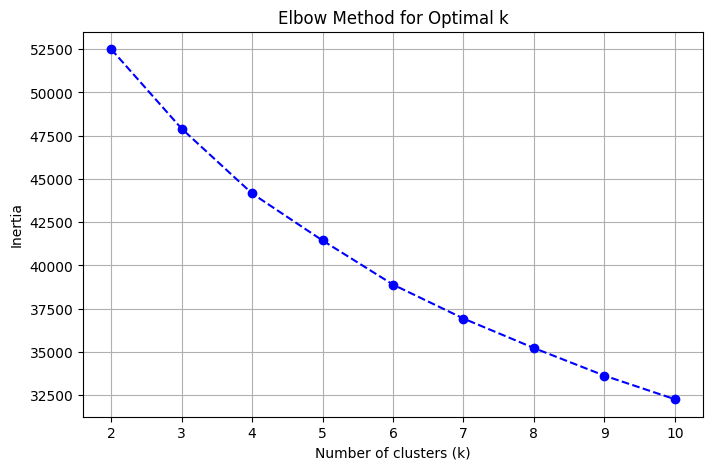

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("environmental factors.csv")

# Select numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols]

# Standardize the numeric features
scaler = StandardScaler()
scaled_d = scaler.fit_transform(X)

# Elbow method to find optimal number of clusters
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_d)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("environmental factors.csv")

# Select numeric columns for clustering
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 7  # Replace with optimal k from Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display first few rows with cluster labels
print(data.head())

# Optional: check distribution of samples in each cluster
print("\nCluster counts:")
print(data['cluster'].value_counts())


   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        6  
1        49.451704        5  
2        19.546561        6  
3        73.664179        4  
4        41.867814        6  

Cluster counts:
cluster
5    1512
6    1499
0    1471
3    1415
2    1413
4    1363
1    1327
Name: count, dtype: int64


In [ ]:
data = pd.read_csv('CC GENERAL.csv')

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
scaler = StandardScaler()

# Drop the CUST_ID column as it is not a numerical feature
data_scaled = scaler.fit_transform(data.drop('CUST_ID', axis=1))

pd.DataFrame(data_scaled, columns=data.drop('CUST_ID', axis=1).columns).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,NaN,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068


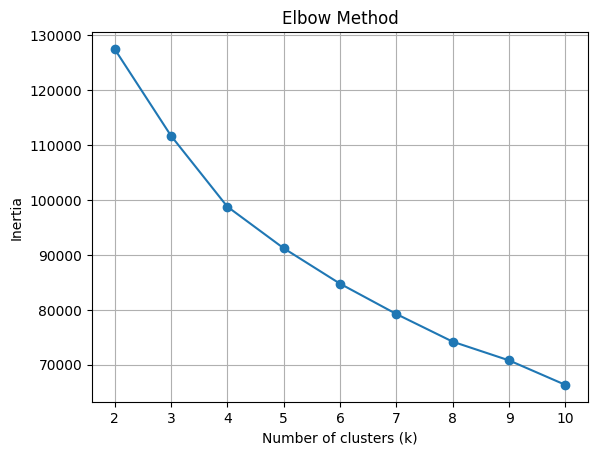

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fill missing values with the mean
data_scaled = np.nan_to_num(data_scaled, nan=np.nanmean(data_scaled, axis=0))

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
k = 7

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

data['cluster'] = kmeans.fit_predict(data_scaled)


data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, data['cluster'])

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.2150287999836473


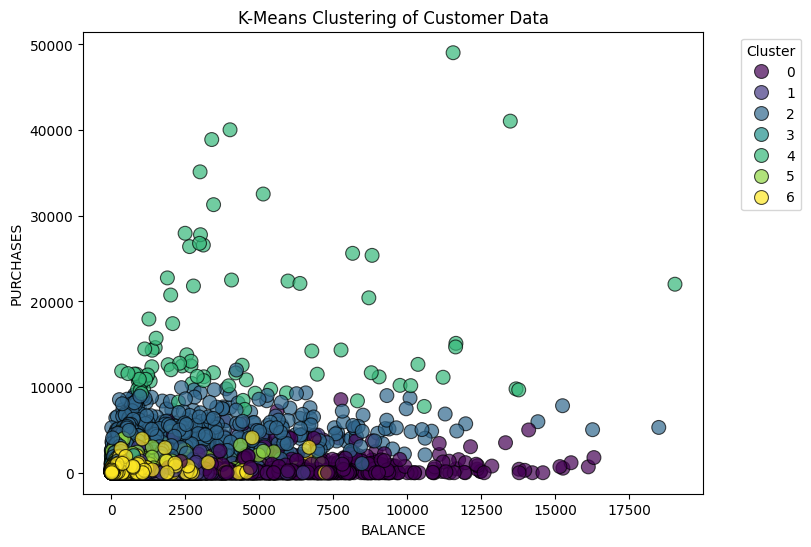

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.scatterplot(x='BALANCE', y='PURCHASES', hue='cluster',
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering of Customer Data')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()